In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,mean_absolute_error

%matplotlib inline

sns.set(style='dark', color_codes=True,palette="magma")

In [16]:
df=pd.read_csv('C:\\Users\\Ekko\\Downloads\\archive (12)\\gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [17]:
df.shape

(2290, 6)

In [18]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### convert Date attribute to date 

In [19]:
df.Date.dtype

dtype('O')

In [20]:
df.Date=pd.to_datetime(df.Date)

### Correlation between attributes

<AxesSubplot:>

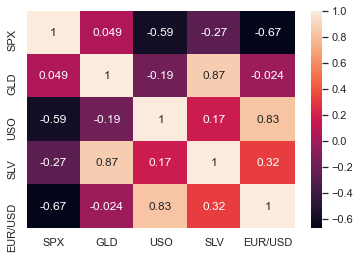

In [21]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [22]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

### Price per year 

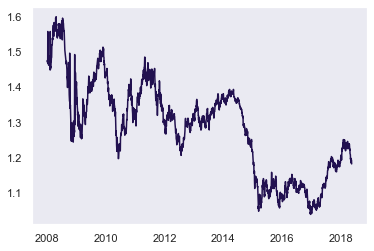

In [23]:
plt.plot(df.Date,df['EUR/USD'])

### Insights 

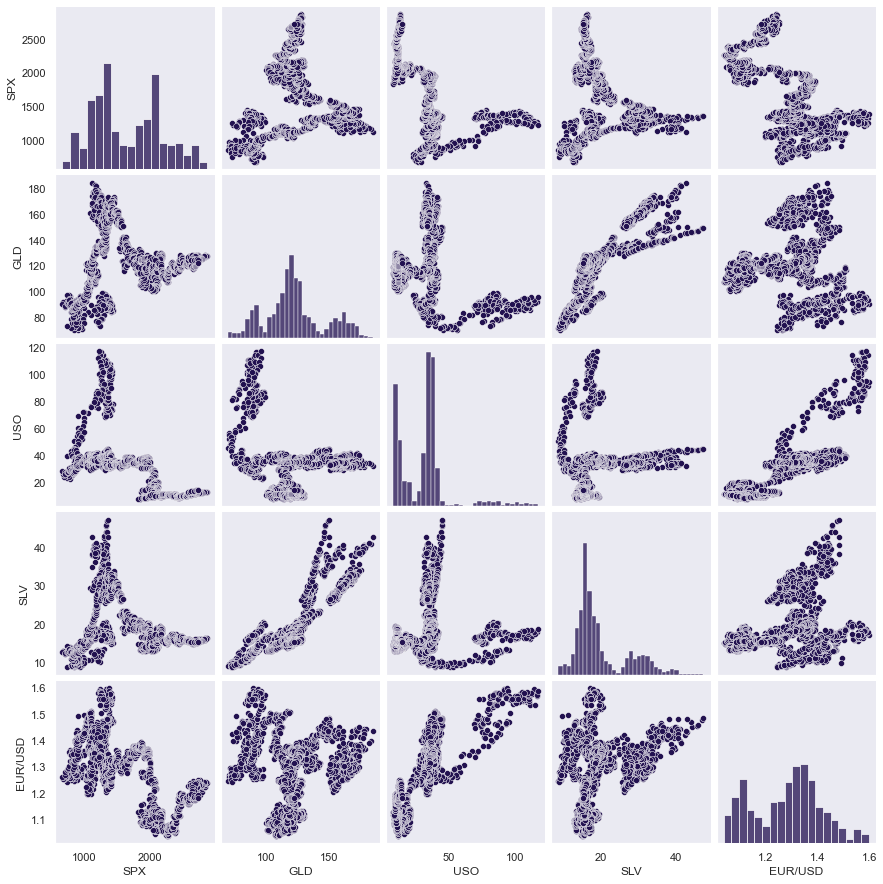

In [24]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'SPX'}>],
       [<AxesSubplot:title={'center':'GLD'}>,
        <AxesSubplot:title={'center':'USO'}>],
       [<AxesSubplot:title={'center':'SLV'}>,
        <AxesSubplot:title={'center':'EUR/USD'}>]], dtype=object)

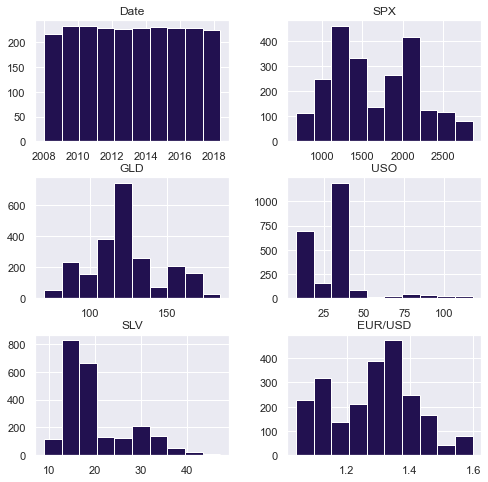

In [25]:
df.hist(figsize=(8,8))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.3341383472692508


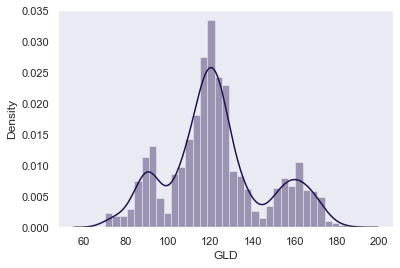

In [26]:
sns.distplot(df['GLD'])
print(df.GLD.skew())

### Building Model

In [27]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [28]:
X=df.drop(['Date','EUR/USD'],axis=1)
X=(X-X.mean())/X.std()  # standarization
Y=df['EUR/USD']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
len(x_train),len(x_test)

(1832, 458)

### Linear reg

In [30]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)
linear_reg_model.score(x_test,y_test)

0.768144432350994

### Polynomial reg 

In [39]:
new_X=X.copy()
new_X=PolynomialFeatures(degree=5).fit_transform(new_X)
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(new_X,Y,test_size=0.2)

poly_reg_model=LinearRegression()
poly_reg_model.fit(x_train_poly,y_train_poly)
poly_reg_model.score(x_test_poly,y_test_poly)

0.9691265938553029

Text(3, 0.75, 'Maximum R^2 ')

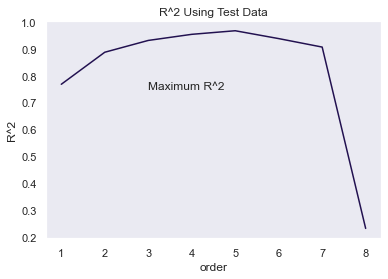

In [32]:
Rsqu_test = []
linear_reg_model=LinearRegression()

order = [1, 2, 3, 4,5,6,7,8]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    linear_reg_model.fit(x_train_pr, y_train)
    
    Rsqu_test.append(linear_reg_model.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

### Lasso

In [33]:
lasso_model=Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)
lasso_model.score(x_test,y_test)

0.7555987422960722

### Random forest

In [34]:
random_forest_model=RandomForestRegressor(n_estimators=40)
random_forest_model.fit(x_train,y_train)
random_forest_model.score(x_test,y_test)

0.982971439268413

### SVM 

In [35]:
svr_model=SVR(C=1)
svr_model.fit(x_train,y_train)
svr_model.score(x_test,y_test)

0.8485952226751453

### GridSearchCV

In [36]:
collection = {
        'random_forest':{
           'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[1,5,10,30,40]
            } 
        },
        'svr_model':{
            'model':SVR(),
            'params':{
                'C':[1,5,10,50],
                'kernel':['linear','rbf']
            }
        },
       
        'lasso_model':{
            'model':Lasso(),
            'params':{
                'alpha':[0.1,0.001,0.0001]
            }
        },
    }

In [37]:
for model_name,data in collection.items() :
    clf=GridSearchCV(data['model'],data['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    print("{},{} =>{} ".format(model_name,clf.best_params_,clf.best_score_))

random_forest,{'n_estimators': 40} =>0.9777253111445928 
svr_model,{'C': 5, 'kernel': 'rbf'} =>0.8577634140250308 
lasso_model,{'alpha': 0.0001} =>0.7560699600098992 


### Model Evaluation

#### Poly reg

In [42]:
y_pred_poly=poly_reg_model.predict(x_test_poly)
print('MAE :'," ", mean_absolute_error(y_test,y_pred_poly))
print('MSE :'," ", mean_squared_error(y_test,y_pred_poly))
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,y_pred_poly)))

MAE :   0.14847857883412216
MSE :   0.034146899701692504
RMAE :   0.18478879755464753


#### random forest

In [44]:
y_pred_randomf=random_forest_model.predict(x_test)
print('MAE :'," ", mean_absolute_error(y_test,y_pred_randomf))
print('MSE :'," ", mean_squared_error(y_test,y_pred_randomf))
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,y_pred_randomf)))

MAE :   0.01153993100436678
MSE :   0.0003005712296910861
RMAE :   0.017336990214310156


#### svm

In [45]:
y_pred_svr=svr_model.predict(x_test)
print('MAE :'," ", mean_absolute_error(y_test,y_pred_svr))
print('MSE :'," ",mean_squared_error(y_test,y_pred_svr))
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))

MAE :   0.043457020111873516
MSE :   0.002672446651185393
RMAE :   0.051695712116048786


### Score Visulaization

In [46]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
   

    plt.show()
    plt.close()

In [47]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

### poly reg

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


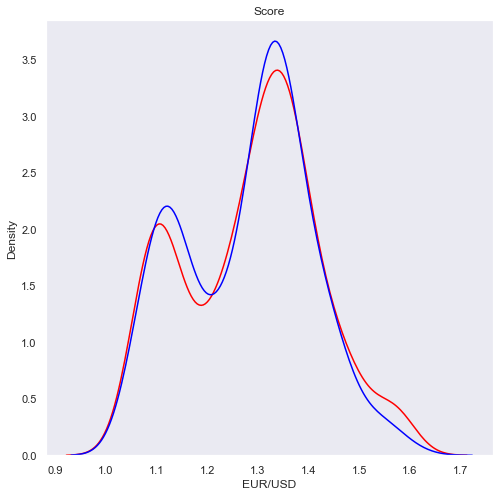

In [48]:
DistributionPlot(y_test,y_pred_poly,'Test data','predication data','Score')

### Random forest

####  for train 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


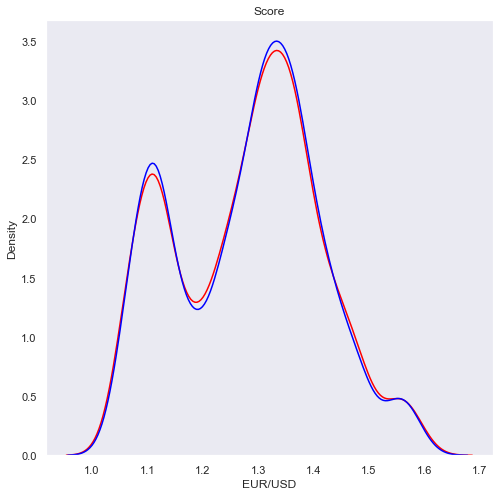

In [49]:
yy=random_forest_model.predict(x_train)
DistributionPlot(y_train,yy,'train data','predication data','Score')

#### for test

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


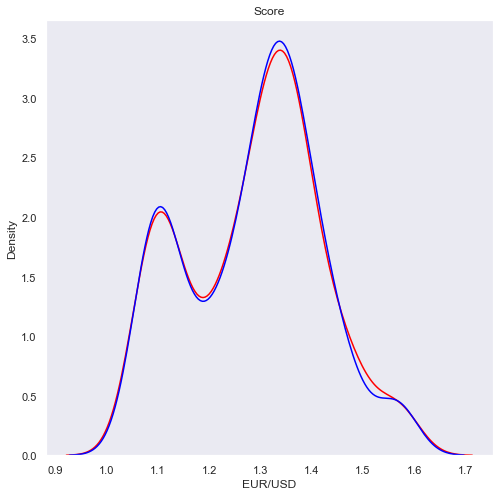

In [50]:
DistributionPlot(y_test,y_pred_randomf,'Test data','predication data','Score')

### SVR

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


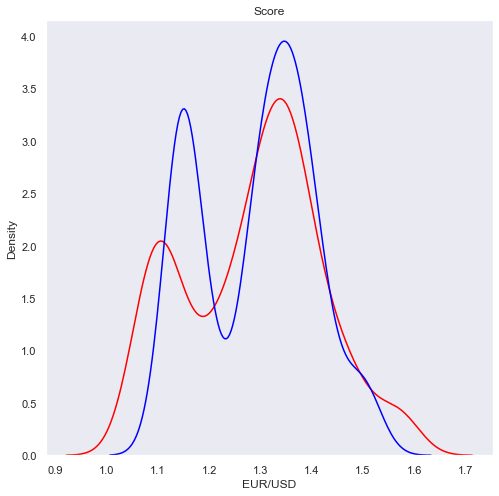

In [51]:
DistributionPlot(y_test,y_pred_svr,'Test data','predication data','Score')